# Importing required Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from warnings import filterwarnings
filterwarnings('ignore')

# Reading the dataset

In [2]:
df = pd.read_excel('Big Mart Sales Prediction - Preprocessing.xlsx',index_col=0)
df['Outlet_Age'] = df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)
num = df.select_dtypes('number').columns.to_list()
BM_num =  df[num]
cat = df.select_dtypes('object').columns.to_list()
BM_cat = df[cat]
BM_cat.apply(lambda x: x.nunique())

Item_Fat_Content         5
Item_Type               16
Outlet_Identifier       10
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64

In [3]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Outlet_Age'],
      dtype='object')

# Label Encoder

In [4]:
Label_Encoder = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    df[i] = Label_Encoder.fit_transform(df[i])
    df[i] = Label_Encoder.fit_transform(df[i])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
Item_Identifier,,,,,,,,,,,,
FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22
NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33


# One Hot Encoding

In [5]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
df_oh = pd.DataFrame(OH_encoder.fit_transform(df[cols])).astype('int64')

#get feature columns
df_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
df_oh.index = df.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
df_fe = pd.concat([df, df_oh], axis=1)

## Dropping few columns which are not important in predicting Item_Outlet_Sales

In [6]:
df_fe  = df_fe.drop(['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [7]:
y = df_fe['Item_Outlet_Sales']
X = df_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

# Standard Scaler

In [8]:
sc = StandardScaler()
sc_train = sc.fit_transform(X_train)
sc_test = sc.transform(X_test)

In [9]:
SS_Xtrain = pd.DataFrame(sc_train,columns=X_train.columns)
SS_Xtest = pd.DataFrame(sc_test,columns=X_train.columns)

# Lasso - Finding out the Best Parameters

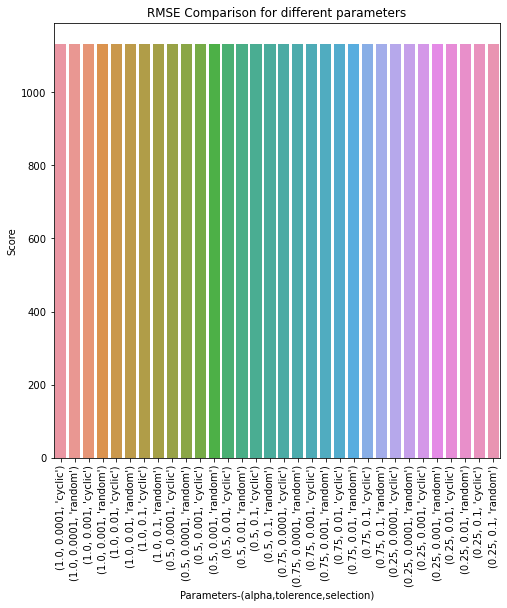

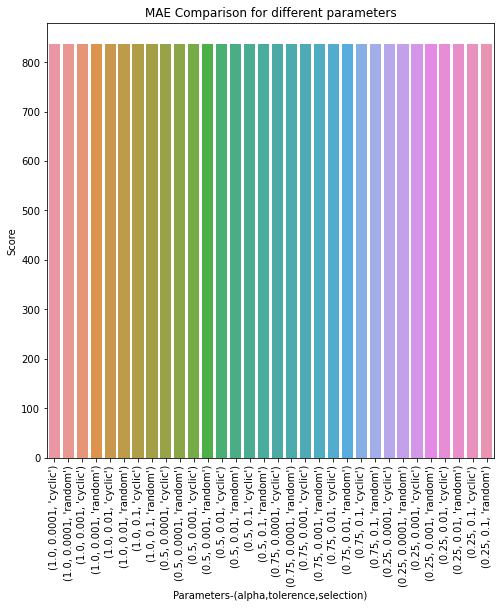

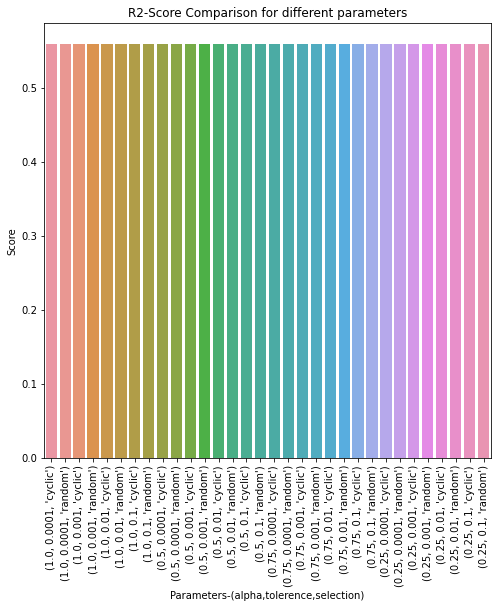

Best Parameters-(alpha,tolerence,selection) : (1.0, 0.01, 'cyclic')


,RMSE,MAE,R2_Score
"alpha,tolerence,selection",,,
"(1.0, 0.01, cyclic)",1133.54,837.50,0.559585
"(1.0, 0.1, random)",1133.55,837.46,0.559573
"(1.0, 0.0001, cyclic)",1133.58,837.51,0.559551
"(1.0, 0.0001, random)",1133.58,837.51,0.559553
"(1.0, 0.001, cyclic)",1133.58,837.51,0.559552
"(1.0, 0.001, random)",1133.58,837.51,0.559551
"(1.0, 0.1, cyclic)",1133.58,837.53,0.559550
"(0.75, 0.1, random)",1133.60,837.53,0.559535
"(0.75, 0.01, cyclic)",1133.60,837.58,0.559533


In [10]:
def tune_lasso(X_train,Y_train,x_test,y_test,alpha,tolerence,selection):
    LS_RMSE = []
    LS_MAE = []
    LS_R2_Score = []
    for i in alpha:
        for j in tolerence:
            for k in selection:
                Lso = Lasso(alpha=i,tol=j,selection=k,random_state=0)
                Lso.fit(X_train,Y_train)
                Ls_pred = Lso.predict(x_test)
                
                mse = mean_squared_error(y_test,Ls_pred)
                rmse = np.round(np.sqrt(mse),2)
                mae = np.round(mean_absolute_error(y_test,Ls_pred),2)
                r2 = r2_score(y_test,Ls_pred)

                LS_RMSE.append(rmse)
                LS_MAE.append(mae)
                LS_R2_Score.append(r2)
                
    ind = []
    for i in alpha:
        for j in tolerence:
            for k in selection:
                val = i,j,k
                ind.append(val)
                
    Result = pd.DataFrame(columns=['RMSE','MAE','R2_Score'],index=ind)
    Result['RMSE'] = LS_RMSE
    Result['MAE'] = LS_MAE
    Result['R2_Score'] = LS_R2_Score
    
    fig = plt.figure(figsize=(8,8))
    sns.barplot(data = Result,x=Result.index,y='RMSE')
    plt.title('RMSE Comparison for different parameters')
    plt.xlabel('Parameters-(alpha,tolerence,selection)')
    plt.ylabel('Score')
    plt.xticks(rotation=90)
    plt.show()
    
    fig = plt.figure(figsize=(8,8))
    sns.barplot(data=Result,x=Result.index,y='MAE')
    plt.title('MAE Comparison for different parameters')
    plt.xlabel('Parameters-(alpha,tolerence,selection)')
    plt.ylabel('Score')
    plt.xticks(rotation=90)
    plt.show()
    
    fig = plt.figure(figsize=(8,8))
    sns.barplot(data=Result,x=Result.index,y='R2_Score')
    plt.title('R2-Score Comparison for different parameters')
    plt.xlabel('Parameters-(alpha,tolerence,selection)')
    plt.ylabel('Score')
    plt.xticks(rotation=90)
    plt.show()
    
    Result.index.name = 'alpha,tolerence,selection'
    pd.set_option('display.max_rows',Result.shape[0]+1)
    
    Result.index.name = 'alpha,tolerence,selection'
    Result.sort_values(by='RMSE',inplace=True)
    print('Best Parameters-(alpha,tolerence,selection) :',Result.index[0])
    return Result

alpha = [1.0,0.5,0.75,0.25]
tolerence  = [0.0001,0.001,0.01,0.1]
selection = ['cyclic','random']
tune_lasso(SS_Xtrain,y_train,SS_Xtest,y_test,alpha,tolerence,selection)

# Ridge - Finding out the Best Parameters

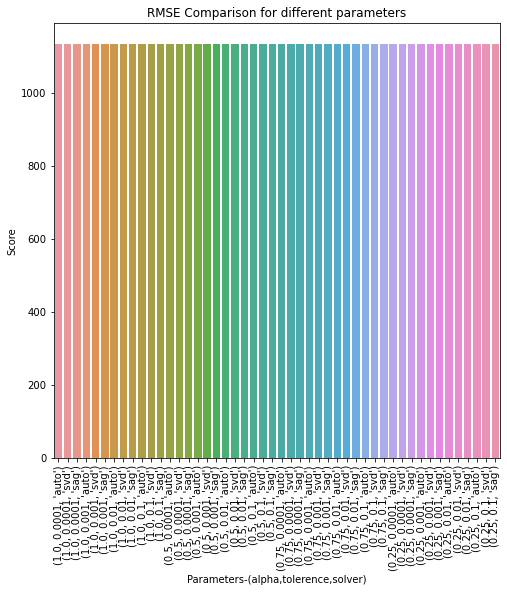

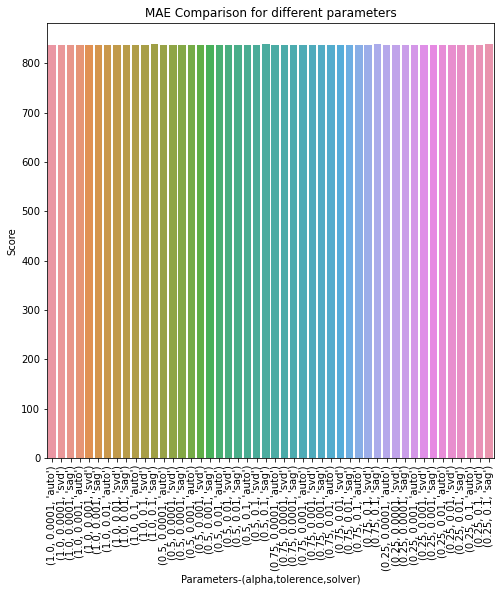

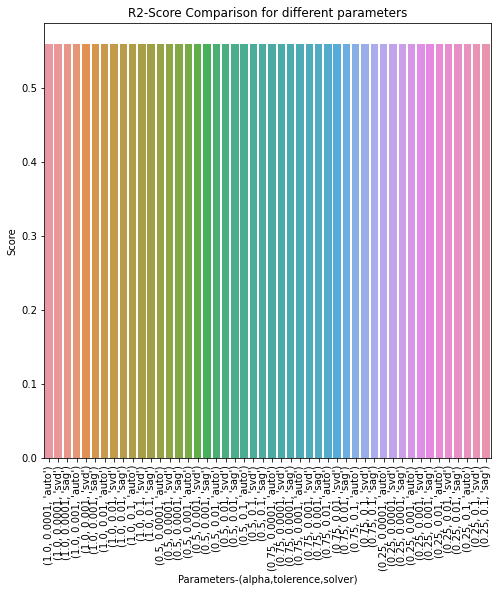

Best Parameters-(alpha,tolerence,solver) : (0.5, 0.01, 'sag')


,RMSE,MAE,R2_Score
"alpha,tolerence,solver",,,
"(0.5, 0.01, sag)",1133.71,837.65,0.559450
"(1.0, 0.01, sag)",1133.71,837.64,0.559446
"(0.25, 0.01, sag)",1133.71,837.65,0.559452
"(0.75, 0.01, sag)",1133.71,837.64,0.559448
"(0.25, 0.001, sag)",1133.78,837.84,0.559395
"(0.5, 0.001, sag)",1133.78,837.83,0.559393
"(1.0, 0.001, sag)",1133.79,837.82,0.559389
"(0.75, 0.001, sag)",1133.79,837.83,0.559391
"(0.5, 0.1, svd)",1133.82,837.86,0.559363


In [11]:
def tune_ridge(X_train,Y_train,x_test,y_test,alpha,tolerence,solver):
    RD_RMSE = []
    RD_MAE = []
    RD_R2_Score = []
    for i in alpha:
        for j in tolerence:
            for k in solver:
                Rd = Ridge(alpha=i,tol=j,solver=k,random_state=0)
                Rd.fit(X_train,Y_train)
                Rd_pred = Rd.predict(x_test)
                
                mse = mean_squared_error(y_test,Rd_pred)
                rmse = np.round(np.sqrt(mse),2)
                mae = np.round(mean_absolute_error(y_test,Rd_pred),2)
                r2 = r2_score(y_test,Rd_pred)

                RD_RMSE.append(rmse)
                RD_MAE.append(mae)
                RD_R2_Score.append(r2)
                
    ind = []
    for i in alpha:
        for j in tolerence:
            for k in solver:
                val = i,j,k
                ind.append(val)
                
    Result = pd.DataFrame(columns=['RMSE','MAE','R2_Score'],index=ind)
    Result['RMSE'] = RD_RMSE
    Result['MAE'] = RD_MAE
    Result['R2_Score'] = RD_R2_Score
    
    
    fig = plt.figure(figsize=(8,8))
    sns.barplot(data = Result,x=Result.index,y='RMSE')
    plt.title('RMSE Comparison for different parameters')
    plt.xlabel('Parameters-(alpha,tolerence,solver)')
    plt.ylabel('Score')
    plt.xticks(rotation=90)
    plt.show()
    
    fig = plt.figure(figsize=(8,8))
    sns.barplot(data=Result,x=Result.index,y='MAE')
    plt.title('MAE Comparison for different parameters')
    plt.xlabel('Parameters-(alpha,tolerence,solver)')
    plt.ylabel('Score')
    plt.xticks(rotation=90)
    plt.show()
    
    fig = plt.figure(figsize=(8,8))
    sns.barplot(data=Result,x=Result.index,y='R2_Score')
    plt.title('R2-Score Comparison for different parameters')
    plt.xlabel('Parameters-(alpha,tolerence,solver)')
    plt.ylabel('Score')
    plt.xticks(rotation=90)
    plt.show()
    
    Result.index.name = 'alpha,tolerence,solver'
    pd.set_option('display.max_rows',Result.shape[0]+1)
    Result.sort_values(by='RMSE',inplace=True)
    print('Best Parameters-(alpha,tolerence,solver) :',Result.index[0])
    return Result

alp = [1.0,0.5,0.75,0.25]
tol  = [0.0001,0.001,0.01,0.1]
sol = ['auto','svd','sag']
tune_ridge(SS_Xtrain,y_train,SS_Xtest,y_test,alp,tol,sol)

# ElasticNet - Finding out the Best Parameters

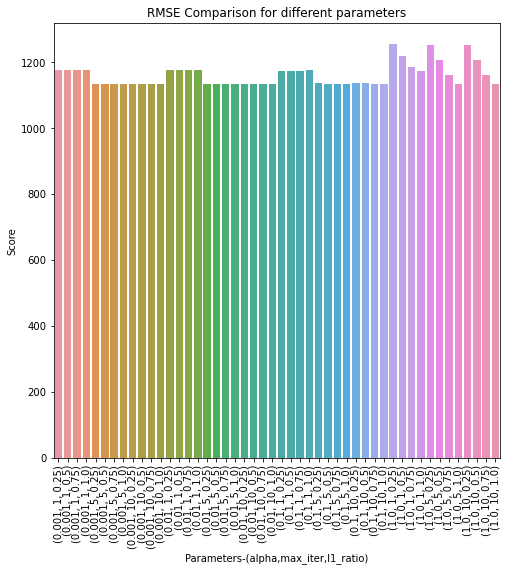

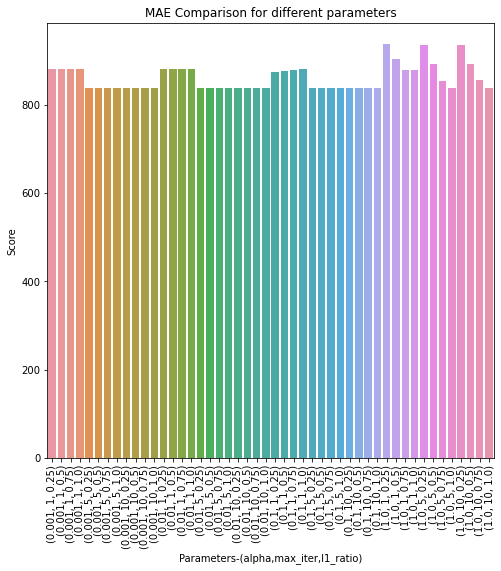

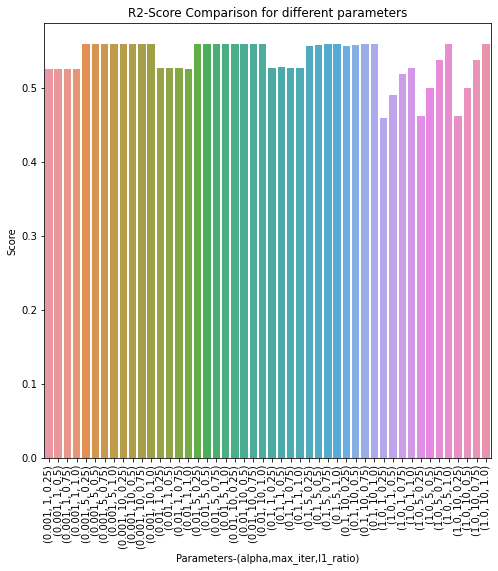

Best Parameters-(alpha,max_iter,l1_ratio) : (1.0, 10, 1.0)


,RMSE,MAE,R2_Score
"alpha,max_iter,l1_ratio",,,
"(1.0, 10, 1.0)",1133.53,837.49,0.559587
"(1.0, 5, 1.0)",1133.58,837.53,0.559550
"(0.1, 10, 1.0)",1133.79,837.82,0.559389
"(0.01, 10, 1.0)",1133.81,837.86,0.559368
"(0.001, 10, 0.5)",1133.82,837.85,0.559362
"(0.001, 10, 0.75)",1133.82,837.85,0.559364
"(0.001, 10, 1.0)",1133.82,837.86,0.559366
"(0.001, 10, 0.25)",1133.83,837.84,0.559360
"(0.1, 5, 1.0)",1133.85,837.84,0.559337


In [12]:
def tune_elasticnet(X_train,Y_train,x_test,y_test,alpha,max_iter,l1_ratio):
    EN_RMSE = []
    EN_MAE = []
    EN_R2_Score = []
    for i in alpha:
        for j in max_iter:
            for k in l1_ratio:
                EN = ElasticNet(alpha=i,max_iter=j,l1_ratio=k,random_state=0)
                EN.fit(X_train,Y_train)
                EN_pred = EN.predict(x_test)
                
                mse = mean_squared_error(y_test,EN_pred)
                rmse = np.round(np.sqrt(mse),2)
                mae = np.round(mean_absolute_error(y_test,EN_pred),2)
                r2 = r2_score(y_test,EN_pred)

                EN_RMSE.append(rmse)
                EN_MAE.append(mae)
                EN_R2_Score.append(r2)
                
    ind = []
    for i in alpha:
        for j in max_iter:
            for k in l1_ratio:
                val = i,j,k
                ind.append(val)
                
    Result = pd.DataFrame(columns=['RMSE','MAE','R2_Score'],index=ind)
    Result['RMSE'] = EN_RMSE
    Result['MAE'] = EN_MAE
    Result['R2_Score'] = EN_R2_Score
    
     
    fig = plt.figure(figsize=(8,8))
    sns.barplot(data = Result,x=Result.index,y='RMSE')
    plt.title('RMSE Comparison for different parameters')
    plt.xlabel('Parameters-(alpha,max_iter,l1_ratio)')
    plt.ylabel('Score')
    plt.xticks(rotation=90)
    plt.show()
    
    fig = plt.figure(figsize=(8,8))
    sns.barplot(data=Result,x=Result.index,y='MAE')
    plt.title('MAE Comparison for different parameters')
    plt.xlabel('Parameters-(alpha,max_iter,l1_ratio)')
    plt.ylabel('Score')
    plt.xticks(rotation=90)
    plt.show()
    
    fig = plt.figure(figsize=(8,8))
    sns.barplot(data=Result,x=Result.index,y='R2_Score')
    plt.title('R2-Score Comparison for different parameters')
    plt.xlabel('Parameters-(alpha,max_iter,l1_ratio)')
    plt.ylabel('Score')
    plt.xticks(rotation=90)
    plt.show()
    
    
    Result.index.name = 'alpha,max_iter,l1_ratio'
    
    pd.set_option('display.max_rows',Result.shape[0]+1)
    
    Result.sort_values(by='RMSE',inplace=True)
    print('Best Parameters-(alpha,max_iter,l1_ratio) :',Result.index[0])
    return Result

max_iter = [1, 5, 10]
alpha =  [0.001, 0.01, 0.1,1.0]
l1_ratio =  [0.25,0.5,0.75,1.0]
tune_elasticnet(SS_Xtrain,y_train,SS_Xtest,y_test,alpha,max_iter,l1_ratio)

### Final Model - Linear Regression , Lasso Regression , Ridge Regression , ElasticNet Regression

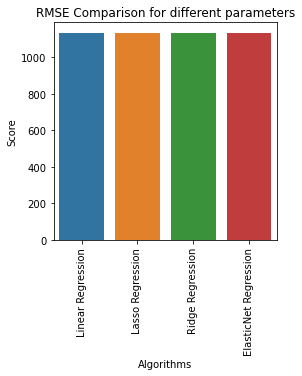

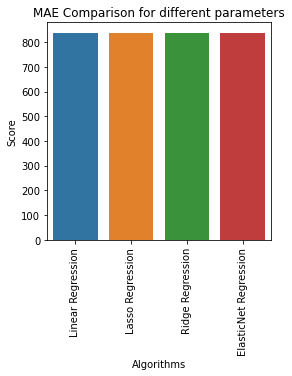

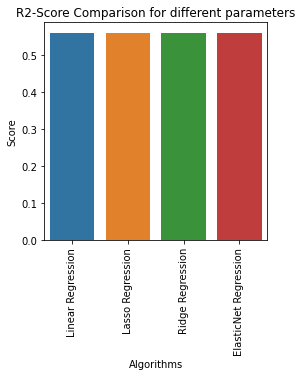

Best Algorithm with less error values:  ElasticNet Regression


,RMSE,MAE,R2_Score
Algorithms,,,
ElasticNet Regression,1133.53,837.49,0.559587
Lasso Regression,1133.54,837.50,0.559585
Ridge Regression,1133.71,837.65,0.559450
Linear Regression,1133.81,837.86,0.559372


In [13]:
RMSE = []
MAE=[]
R2_Score = []

model = LinearRegression(n_jobs=-1)
model.fit(SS_Xtrain,y_train)
pred = model.predict(SS_Xtest)
mse = mean_squared_error(y_test,pred)
rmse = np.round(np.sqrt(mse),2)
mae = np.round(mean_absolute_error(y_test,pred),2)
r2 = r2_score(y_test,pred)

RMSE.append(rmse)
MAE.append(mae)
R2_Score.append(r2)


model = Lasso(alpha=1.0,tol=0.01,selection='cyclic',random_state=0)
model.fit(SS_Xtrain,y_train)
pred = model.predict(SS_Xtest)
mse = mean_squared_error(y_test,pred)
rmse = np.round(np.sqrt(mse),2)
mae = np.round(mean_absolute_error(y_test,pred),2)
r2 = r2_score(y_test,pred)

RMSE.append(rmse)
MAE.append(mae)
R2_Score.append(r2)

model = Ridge(alpha=0.5,tol=0.01,solver='sag',random_state=0)
model.fit(SS_Xtrain,y_train)
pred = model.predict(SS_Xtest)
mse = mean_squared_error(y_test,pred)
rmse = np.round(np.sqrt(mse),2)
mae = np.round(mean_absolute_error(y_test,pred),2)
r2 = r2_score(y_test,pred)

RMSE.append(rmse)
MAE.append(mae)
R2_Score.append(r2)

model = ElasticNet(alpha=1.0,max_iter=10,l1_ratio=1.0,random_state=0)
model.fit(SS_Xtrain,y_train)
pred = model.predict(SS_Xtest)
mse = mean_squared_error(y_test,pred)
rmse = np.round(np.sqrt(mse),2)
mae = np.round(mean_absolute_error(y_test,pred),2)
r2 = r2_score(y_test,pred)

RMSE.append(rmse)
MAE.append(mae)
R2_Score.append(r2)    
    
Final_Result = pd.DataFrame(index=['Linear Regression','Lasso Regression','Ridge Regression','ElasticNet Regression'],
                            columns=['RMSE','MAE','R2_Score'])
Final_Result['RMSE'] = RMSE
Final_Result['MAE'] = MAE
Final_Result['R2_Score'] = R2_Score

fig = plt.figure(figsize=(4,4))
sns.barplot(data = Final_Result,x=Final_Result.index,y='RMSE')
plt.title('RMSE Comparison for different parameters')
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()

fig = plt.figure(figsize=(4,4))
sns.barplot(data=Final_Result,x=Final_Result.index,y='MAE')
plt.title('MAE Comparison for different parameters')
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()

fig = plt.figure(figsize=(4,4))
sns.barplot(data=Final_Result,x=Final_Result.index,y='R2_Score')
plt.title('R2-Score Comparison for different parameters')
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()


Final_Result.index.name = 'Algorithms'
pd.set_option('display.max_rows',Final_Result.shape[0]+1)
Final_Result.sort_values(by='RMSE',inplace=True)
print("Best Algorithm with less error values: ",Final_Result.index[0])
Final_Result

## Conclusion :
    > From the above Final_Result table, we conclude that ElasticNet Regression Algorithm performs better than other algorithms with
    RMSE-1133.53, MAE - 837.49, R2_Score = 0.559587